<h1 style="font-size:200%"> <center> Supermarket Customer Segementation</center></h1>

---


<img src="https://www.segmentify.com/wp-content/uploads/2021/08/Top-Customer-Segmentation-Examples-every-Marketer-Needs-to-Know.png" width="100%">

In [288]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import davies_bouldin_score, silhouette_score

from flask import Flask,jsonify,request,render_template

%matplotlib inline

np.random.seed(7)
plt.rcParams['figure.figsize'] = (16, 6)
# to change default colormap
sns.set(style="darkgrid")
sns.set_palette("pastel")

# 1 Introduction

Ad spend waste is major problem facing all businesses. In 2021 alone, [US$3 billion of ad spend was wasted](https://www.contentgrip.com/digital-advertisers-waste/#:~:text=In%202021%2C%20Next%26Co%20reported%20that,producing%20high%2Dquality%20branded%20content.). One of the major contributors to this waste is the mistake of targeting the wrong audience. An ad campaign's goal is to grab the attention of as many customers as possible. Therefore, it should be marketed towards the group that is most likely to buy the product. In turn, bringing more revenue. 

## 1.1 About This Project 

In this project, we will explore the data collected by a supermarket about its cutomers. We will get some statistics about the general customers of the supermarket and their habits. Then we will attempt to divide the customers into segments using various clustering techniques. We will try to evaluate the clustering using some popular metrics. However, we will have to delve deep into the cluster in order to assess the correctness of the clustering algorithm. 

In the end of the project we would have a statistical description of the various customer segments and their spending habits. The supermarket can then utilize those segments in order to market their products better.

## 1.2 About the Dataset

The [Customer Personality Analysis](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis) dataset contains a description of the ideal customers of a company. It contains 29 columns detailing the habits and demographic of the customer. The features are divided into 5 categories

<h2 style="font-size:100%"> People:</h2>

| # | Feature | Description
| --- | --- | --- 
| 1 | ID | Customer's unique identifier
| 2 | Year_Birth | Customer's birth year
| 3 | Education | Customer's education level
| 4 | Marital_Status | Customer's marital status
| 5 | Income | Customer's yearly household income
| 6 | Kidhome | Number of children in customer's household
| 7 | Teenhome | Number of teenagers in customer's household
| 8 | Dt_Customer | Date of customer's enrollment with the company
| 9 | Recency | Number of days since customer's last purchase
| 10 | Complain | 1 if the customer complained in the last 2 years, 0 otherwise

<h2 style="font-size:100%"> Products:</h2>

| # | Feature | Description
| --- | --- | --- 
| 11 | MntWines | Amount spent on wine in last 2 years
| 12 | MntFruits | Amount spent on fruits in last 2 years
| 13 | MntMeatProducts | Amount spent on meat in last 2 years
| 14 | MntFishProducts | Amount spent on fish in last 2 years
| 15 | MntSweetProducts | Amount spent on sweets in last 2 years
| 16 | MntGoldProds | Amount spent on gold in last 2 years

<h2 style="font-size:100%"> Promotion:</h2>

| # | Feature | Description
| --- | --- | --- 
| 17 | NumDealsPurchases | Number of purchases made with a discount
| 18 | AcceptedCmp1 | 1 if customer accepted the offer in the 1st campaign, 0 otherwise
| 19 | AcceptedCmp2 | 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
| 20 | AcceptedCmp3 | 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
| 21 | AcceptedCmp4 | 1 if customer accepted the offer in the 4th campaign, 0 otherwise
| 22 | AcceptedCmp5 | 1 if customer accepted the offer in the 5th campaign, 0 otherwise
| 23 | Response | 1 if customer accepted the offer in the last campaign, 0 otherwise

<h2 style="font-size:100%"> Place:</h2>

| # | Feature | Description
| --- | --- | --- 
| 24 | NumWebPurchases | Number of purchases made through the company’s website
| 25 | NumCatalogPurchases | Number of purchases made using a catalogue
| 26 | NumStorePurchases | Number of purchases made directly in stores
| 27 | NumWebVisitsMonth | Number of visits to company’s website in the last month

<h2 style="font-size:100%"> Uncategorized:</h2>

| # | Feature | Description
| --- | --- | --- 
| 28 | Z_CostContact | -
| 29 | Z_Revenue | -

# 2 Data Overview <a class="anchor" id="overview"></a>

## 2.1 Data Reading <a class="anchor" id="data_read"></a>

In [289]:
df = pd.read_csv("marketing_campaign.csv", sep="\t")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


## 2.2 Dataset Info <a class="anchor" id="data_info"></a>

In [290]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

## 2.3 Numerical Description <a class="anchor" id="num_des"></a>

In [291]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


## 2.4 Categorical Description <a class="anchor" id="cat_des"></a>

In [292]:
df.describe(include='object')

,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


## 2.5 Initial Data Assessment <a class="anchor" id="init_assess"></a>

From the numerical description, we can see that the year of birth and income columns contain extreme outliers. that we will have to deal with. The Z_CostContact and Z_Revenue columns only contain a single value, therefore they should be removed. Furthermore, the ID column will not aid us in our analysis and should be removed as well. Finally, the income column contains a small number of missing values. 

# 3 EDA <a class="anchor" id="eda"></a>

In [293]:
def set_labels(x="", y="", title="", axis=None):
  if axis:
    axis.set_xlabel(x);
    axis.set_ylabel(y);
    axis.set_title(title);
  else:
    plt.title(title);
    plt.xlabel(x);
    plt.ylabel(y);

## 3.1 People <a class="anchor" id="eda_people"></a>

### 3.1.1 What is the distribution of the years of birth for our customers? <a class="anchor" id="eda_people_1"></a>

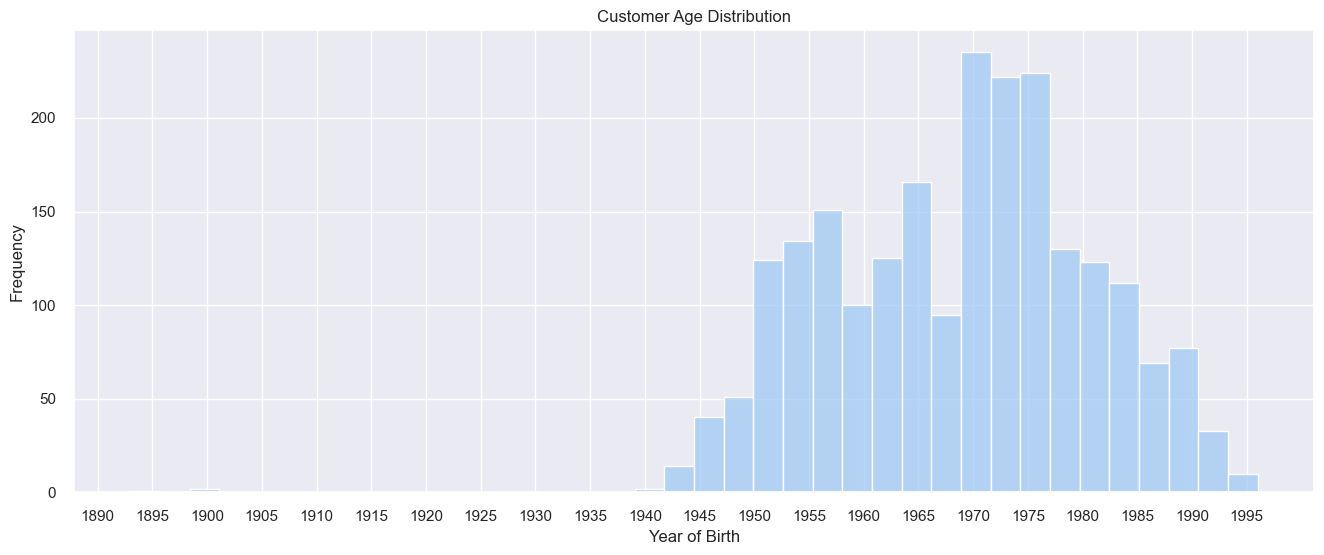

In [294]:
set_labels(x="Year of Birth", y="Frequency", title="Customer Age Distribution")
plt.xticks(list(range(1830,2000,5)))
sns.histplot(df['Year_Birth']);

Most customers are aged born from 1970 to 1978. Old people seem to have more frequency than younger individuals. Some outliers exist.

### 3.1.2 What is the education level distribution? <a class="anchor" id="eda_people_2"></a>

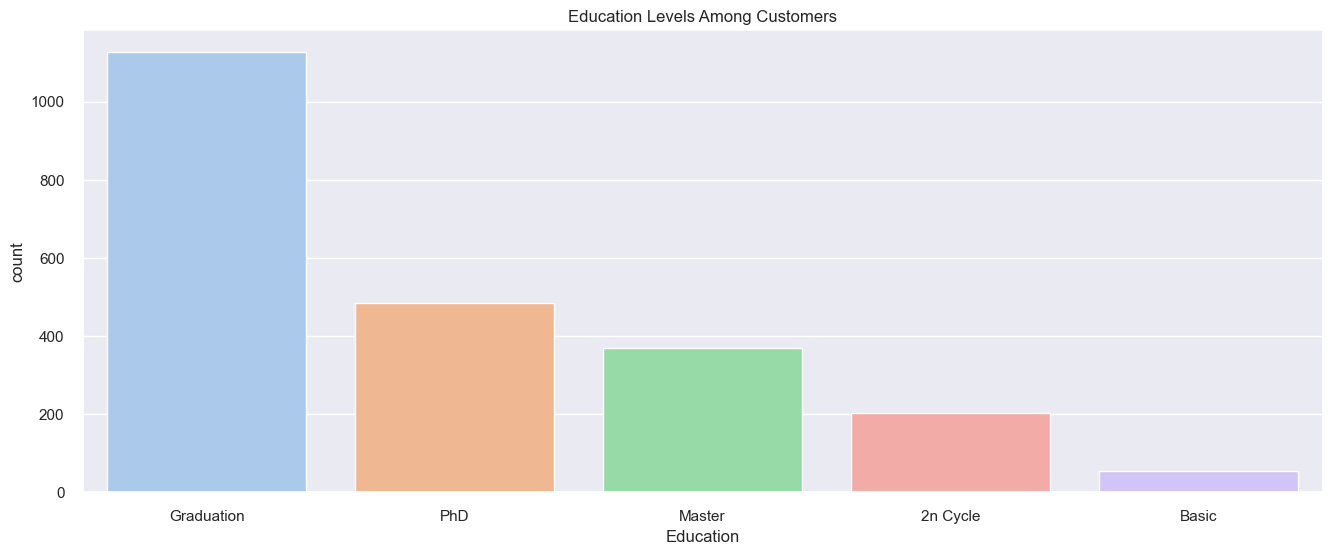

In [295]:
set_labels(x="Education Level", y="Frequency", title="Education Levels Among Customers")
sns.countplot(x=df.Education, order = df.Education.value_counts().index);

### 3.1.3 What is the martial status of the majority of customers? <a class="anchor" id="eda_people_3"></a>

In [296]:
rel = df.Marital_Status.value_counts()
rel

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

We can see a multitude of invalid values. ['Married', 'Together'] can count as a relationship. While ['Single', 'Divorced', 'Widow', 'Alone'] all fall under single status. Meanwhile 'Absurd' and 'YOLO' can be discarded since they do not have any meaning

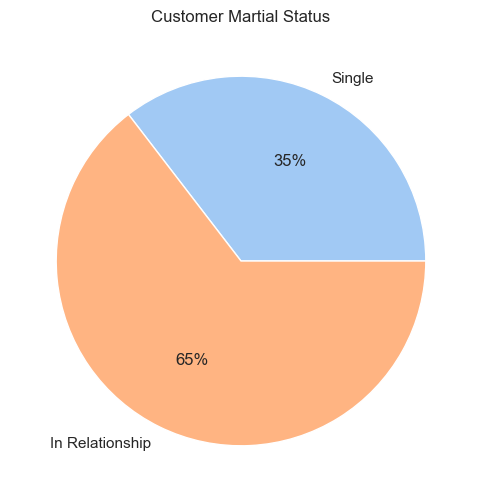

In [297]:
single = rel[['Single', 'Divorced', 'Widow', 'Alone']].sum()
relationship =  rel[['Married', 'Together']].sum()

set_labels(title="Customer Martial Status")
plt.pie([single, relationship], labels = ['Single', 'In Relationship'], autopct='%.0f%%');

Most of the customers are in a relationship (65%)

### 3.1.4 What is the income of most of the cutomers? <a class="anchor" id="eda_people_4"></a>

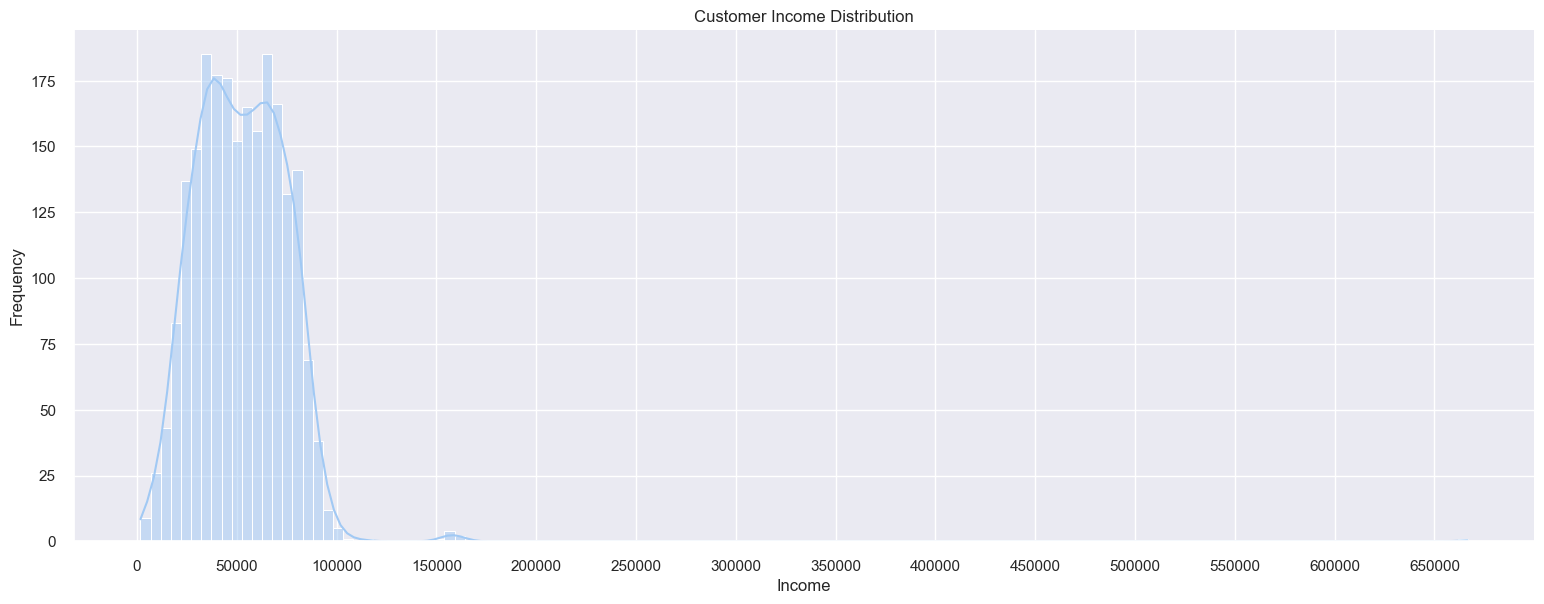

In [298]:
sns.displot(df['Income'], kde=True, height=6, aspect=2.6);
plt.xticks(list(range(0,700000,50000)))

set_labels(x="Income", y="Frequency", title="Customer Income Distribution")

We can notice extreme outliers in income. Ignore them to take a closer look

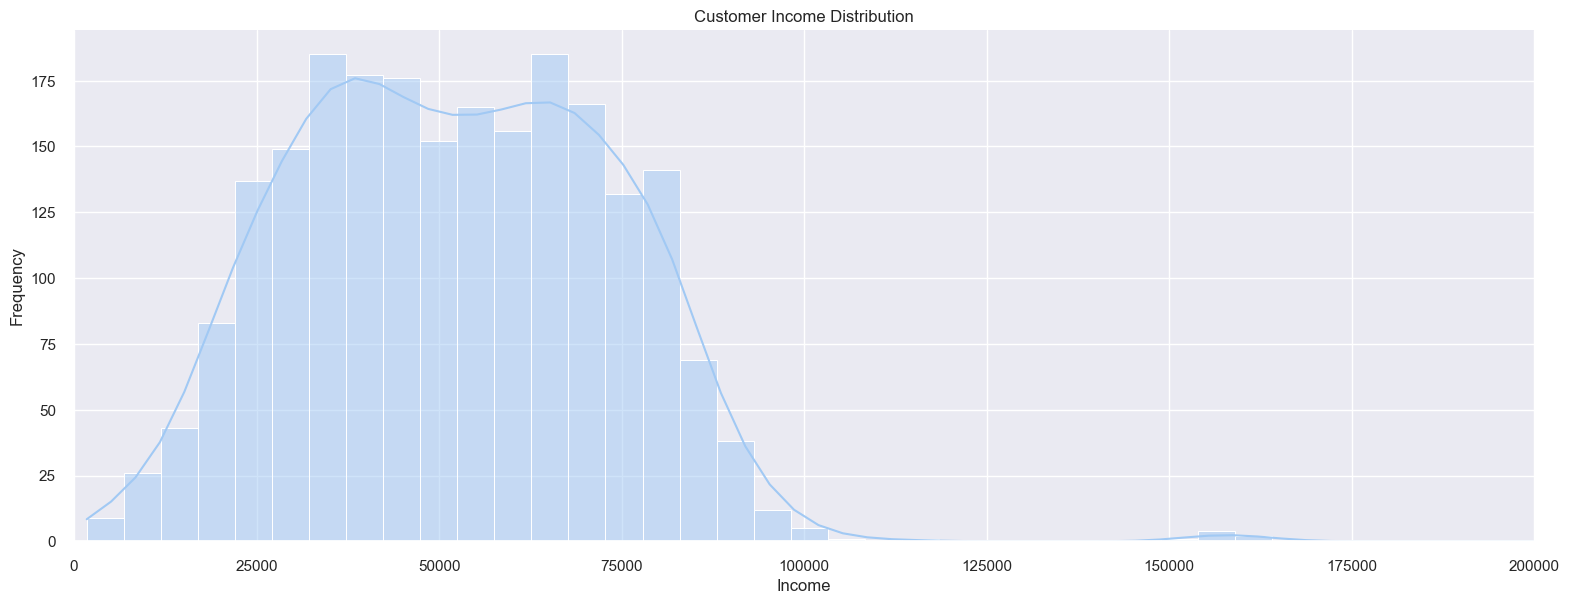

In [299]:
sns.displot(df['Income'], kde=True, height=6, aspect=2.6);
plt.xlim([0, 200000]);
set_labels(x="Income", y="Frequency", title="Customer Income Distribution")

The distribution is bimodal and the most common yearly incomes are approxiimately $30,000 and $65,000. 

### 3.1.5 What is the most common number for kids and teens? <a class="anchor" id="eda_people_5"></a>

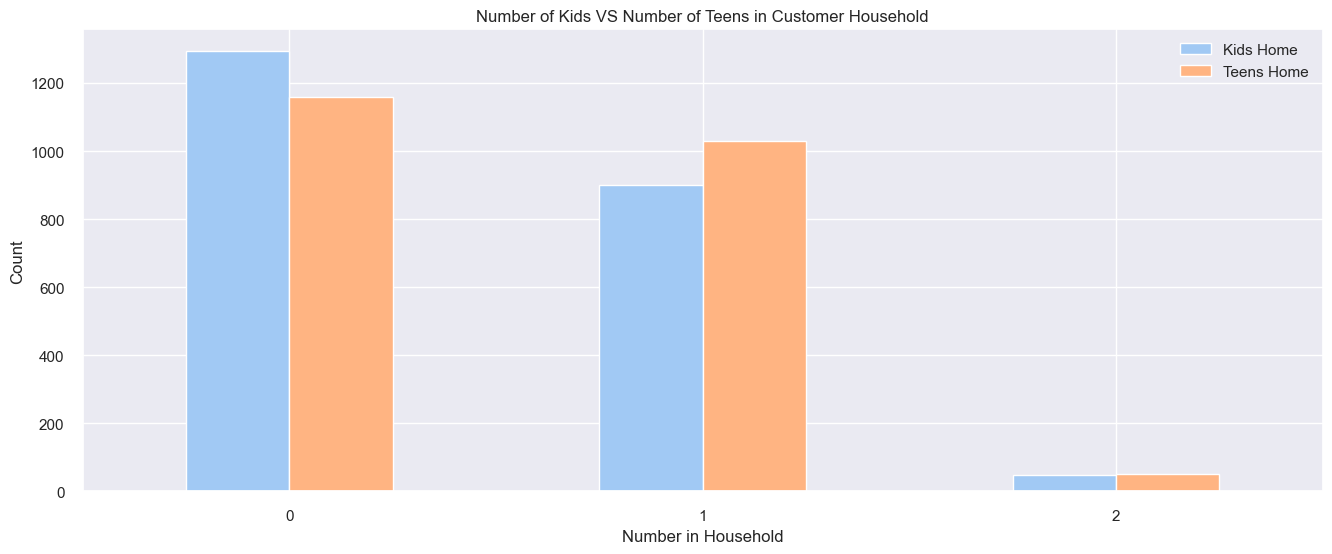

In [300]:
kid = df.Kidhome.value_counts()
teen = df.Teenhome.value_counts()

counts = pd.DataFrame({0:[kid[0], teen[0]], 1:[kid[1], teen[1]] ,2:[kid[2], teen[2]]},
                    index=['Kids Home', 'Teens Home']).T

counts.plot(kind="bar", rot=0);
set_labels(x="Number in Household", y="Count", title="Number of Kids VS Number of Teens in Customer Household")

Most customers have no teens and no kids. However people who have a single teen are more than people than have a single kid.

### 3.1.6 Since when did the supermarket gain its customers? <a class="anchor" id="eda_people_6"></a>

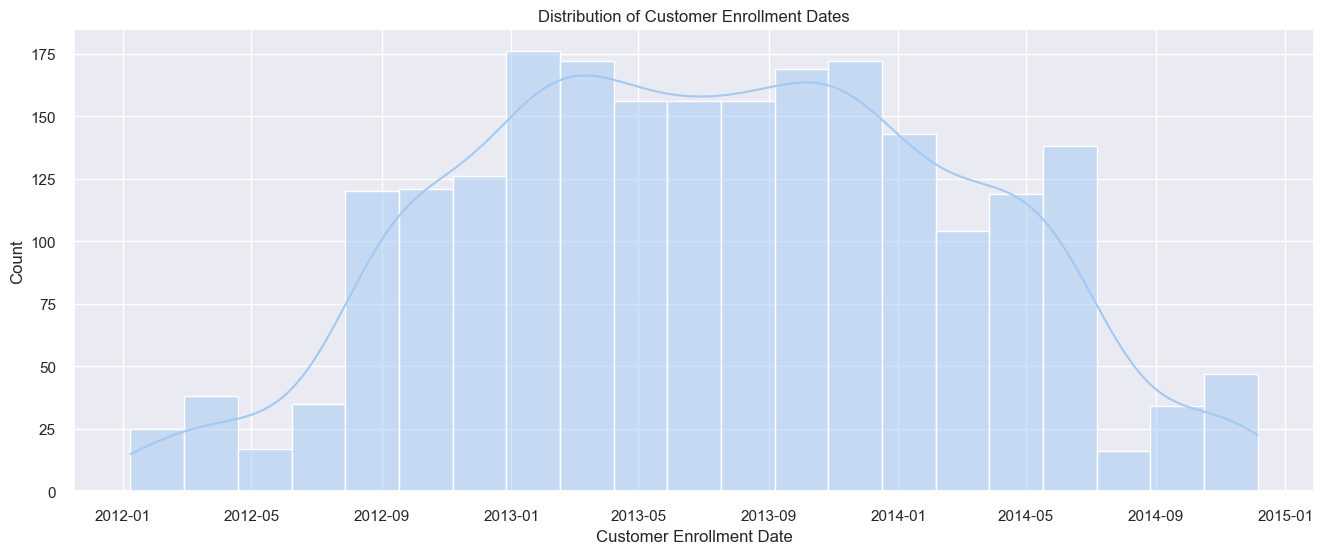

In [301]:
set_labels(x="Customer Enrollment Date", y="Count", title="Distribution of Customer Enrollment Dates")
sns.histplot(pd.to_datetime(df['Dt_Customer']), kde=True);

Enrollment dates are normally distributed with most customers falling between 07/2012 and 07/2014. 

### 3.1.7 What is the most common number of days since a customer's last purchase? <a class="anchor" id="eda_people_7"></a>

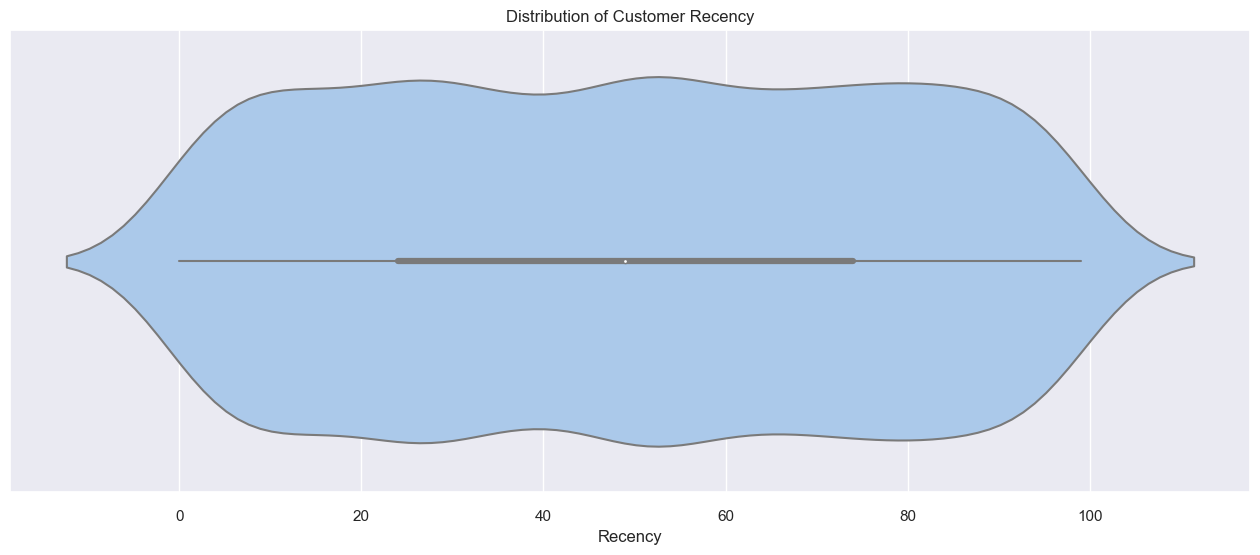

In [302]:
set_labels(x="Number of Days Since Customer's Last Purchase", title="Distribution of Customer Recency")
sns.violinplot(x=df['Recency']);

Customer recency is almost uniformly distributed. Most number of days have similar frequencies.

### 3.1.8 What is the percentage of complaining customers? <a class="anchor" id="eda_people_8"></a>

In [303]:
counts = df.Complain.map({0:"No", 1:"Yes"}).value_counts()

fig = px.pie(values=counts.values, names=counts.index, hole=0.6,
             color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_layout(title_text='Percentage of Customers Who Complained in The Last 2 Years', title_x=0.5)


99% of customers did not complain in the past 2 years.

## 3.2 Products <a class="anchor" id="eda_products"></a>

### 3.2.1 Which products do people spend the most amount on? <a class="anchor" id="eda_products_1"></a>

In [304]:
avg = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
          'MntSweetProducts', 'MntGoldProds']].mean(axis=0)

fig = px.pie(values=avg.values, names=avg.index,  
             color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_layout(title_text='Average Amount Spent on Product Categories', title_x=0.5,
                  legend=dict(
                      yanchor="top",
                      y=0.99,
                      xanchor="right",
                      x=0.99
                  ))

50% of the average customer spending is on wine, followed by meat at 27% of spendings.

### 3.2.2 Does the product spending differ by education level? <a class="anchor" id="eda_products_2"></a>

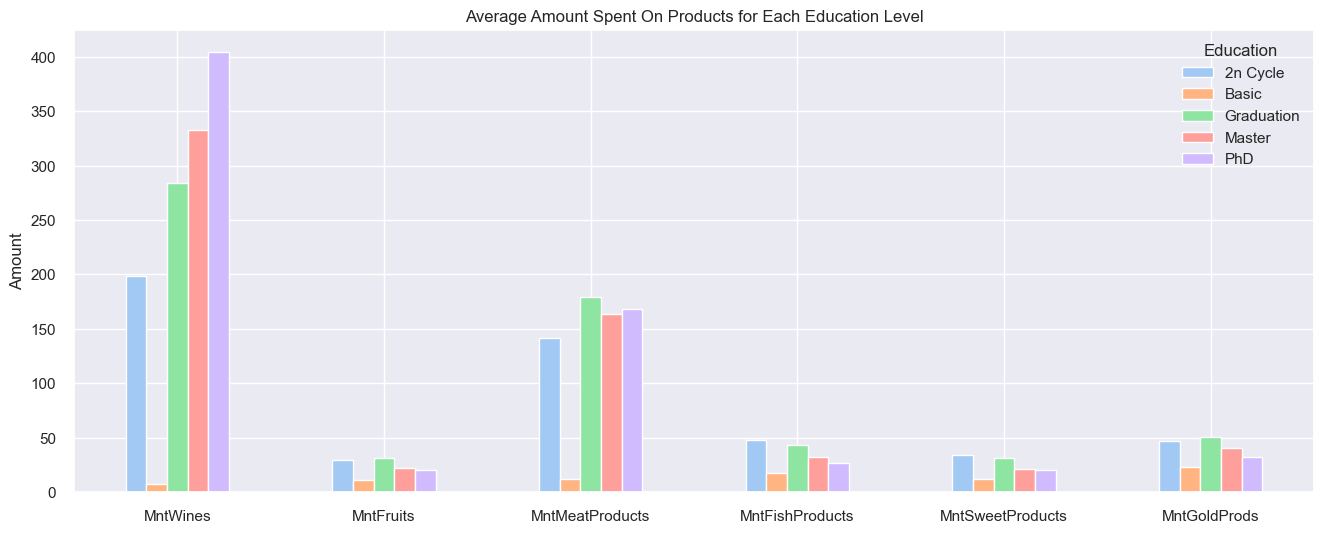

In [305]:
cat = df.groupby('Education')[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
          'MntSweetProducts', 'MntGoldProds']].mean().T

cat.plot(kind='bar', rot=0);
set_labels(y="Amount", title="Average Amount Spent On Products for Each Education Level");

The figure indicates that PhD holders spend the most on wine. For fruits, gold, and meat products, "graduation" educated individuals spend the most. While "2n cycle" spend the most on fish and sweets.

### 3.2.3 Does Dissatisfaction Affect Spending? <a class="anchor" id="eda_products_3"></a>

In [306]:
cat = df.copy()
cat.Complain = cat.Complain.map({0:"No", 1:"Yes"})
cat = round(cat.groupby('Complain')[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
          'MntSweetProducts', 'MntGoldProds']].mean().T.unstack().reset_index(level=1, name='mean') \
          .rename(columns={'level_1':'category'}).reset_index(), 2)

fig = px.bar(data_frame=cat, y='mean', x='Complain',
             text=cat['mean'].map(lambda x: str(x)),
             color_discrete_sequence=px.colors.qualitative.Pastel,
             color='category')

fig.update_layout(title="Spending of Complaining Vs Non-complaining Individuals", title_x=0.5)

As expected, people who complain about the service use it less. The average spending for complainers is far less across all product categories.

## 3.3 Promotion <a class="anchor" id="eda_promotion"></a>

### 3.3.1 What is the distributed of discounted purchases among different education levels? <a class="anchor" id="eda_promotion_1"></a>

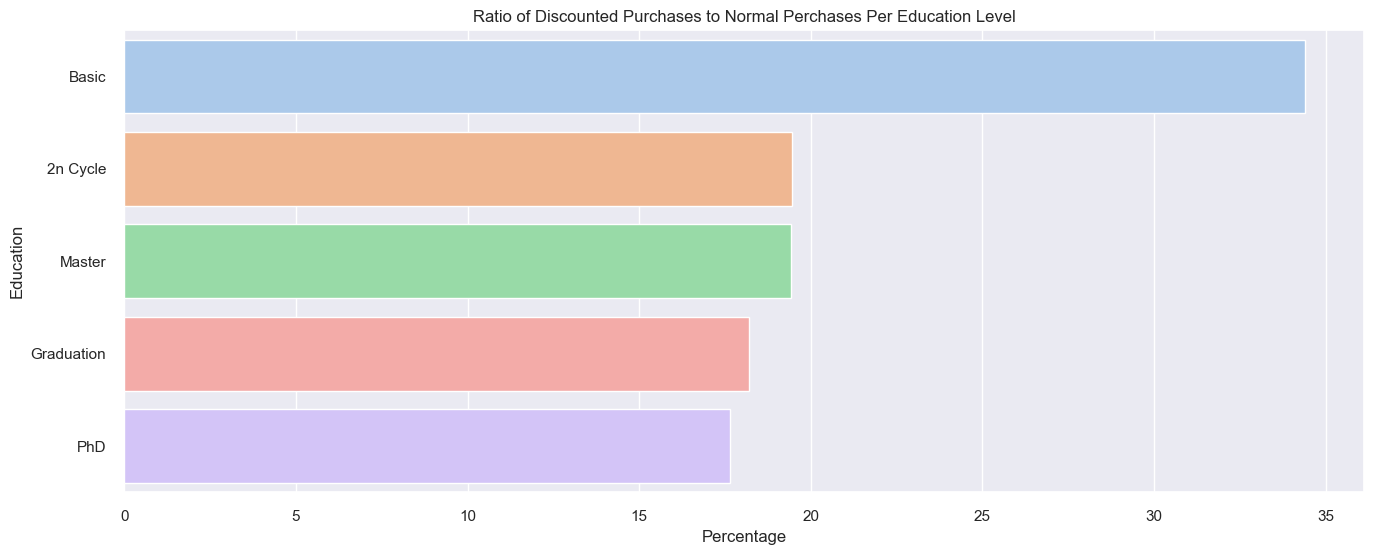

In [307]:
discounted_purchases = df.groupby('Education').NumDealsPurchases.sum()
total_purchases = df.groupby('Education')[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum().sum(axis=1)

percentage = round(discounted_purchases * 100 / total_purchases, 2).sort_values(ascending=False)
sns.barplot(y=percentage.index, x=percentage.values);
set_labels(x="Percentage", y="Education", title="Ratio of Discounted Purchases to Normal Perchases Per Education Level");

We can see that the least educated individuals have a significantly higher percentage of discounted purchases. The least percentage of discounted purchases is carried out by PhD holders.

### 3.3.2 Which campaign is the most successfull among customers? <a class="anchor" id="eda_promotion_2"></a>

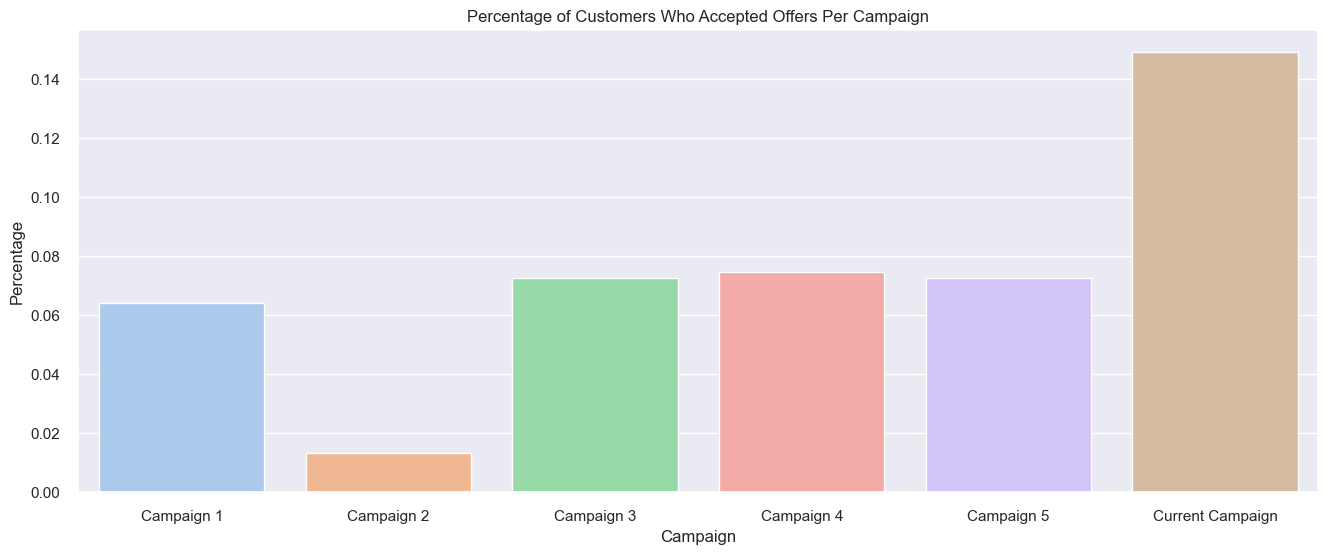

In [308]:
aCmp = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
           'AcceptedCmp5', 'Response']].sum(axis=0) / len(df)
names = ['Campaign 1','Campaign 2','Campaign 3','Campaign 4','Campaign 5','Current Campaign']

set_labels(y="Percentage", x="Campaign", title="Percentage of Customers Who Accepted Offers Per Campaign");
sns.barplot(y=aCmp.values, x=names);

We can observe that the demand on campaign offers is extremely low among customers, as the most successful campaign attracted only about 15% of the customers.

### 3.3.3 What is the percentage of accepted offers by campaign from all accepted offers? <a class="anchor" id="eda_promotion_3"></a>

In [309]:
aCmp = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
           'AcceptedCmp5', 'Response']].sum(axis=0)
names = ['Campaign 1','Campaign 2','Campaign 3','Campaign 4','Campaign 5','Current Campaign']

fig = px.pie(values=aCmp.values, names=names, hole=0.6,
             color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_layout(title_text='Percentage of Accepted Offers Per Campaign', title_x=0.5)

The current campaign has far more accepted offers, taking around 33.4% of all accepted offers. Making it by far the most successful campaign.

### 3.3.4 Which outlet had the most amount of purchases? <a class="anchor" id="eda_promotion_4"></a>

In [310]:
columns = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
columns_new = ['Web Purchases', 'Catalog Purchases', 'Store Purchases']

total = df[columns].sum()
total.index = columns_new
total = total.reset_index(name='total')

fig = px.treemap(total, path=['index'],values='total',
                 color_discrete_sequence=px.colors.qualitative.Pastel)

fig.data[0].textinfo = 'label+text+value'
fig.update_layout(margin = dict(t=25, l=25, r=25, b=25),
                  title_text='Number of Purchases Made Per Place',
                  title_x = 0.5,
                  title_y = 0.96)
fig.update_traces(textposition='middle center')
fig.layout.hovermode = False

fig.show()

We can see than the most purchases Were made in  store, this is followed by web purchases at 9150. The least purchases were catalog purchases.

# 4 Data Cleaning <a class="anchor" id="cleaning"></a>

## 4.1 Missing Values <a class="anchor" id="cleaning_missing"></a>

In [311]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

The income is missing from 24 rows. We can safely delete these rows since they are small in number.

In [312]:
df = df.dropna()
df.shape

(2216, 29)

After removing the rows with missing values, we end up with 2216 rows 

## 4.2 Incorrect Types <a class="anchor" id="cleaning_incorrect"></a>

In [313]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

The Dt_Customer column is of type object however it contains a DateTime. Foe simplicity, we will extract the year as an integer

In [314]:
df.Dt_Customer = pd.to_datetime(df['Dt_Customer']).dt.year

df['Dt_Customer']

0       2012
1       2014
2       2013
3       2014
4       2014
        ... 
2235    2013
2236    2014
2237    2014
2238    2014
2239    2012
Name: Dt_Customer, Length: 2216, dtype: int64

## 4.3 Inconsistent Values <a class="anchor" id="cleaning_inconsistent"></a>

In [315]:
df.Education.unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In education we have many values for education, we can cinvert them into something understandable. With some research, it is found that "2n cycle" is master's, Basic education is till highscool, and Graduation is bachelors.

In [316]:
df.Education.replace({"Graduation": "UnderGraduate",
                      "Basic": "High School",
                      "2n Cycle":"Master"},
                      inplace=True)

df.Education.unique()

array(['UnderGraduate', 'PhD', 'Master', 'High School'], dtype=object)

In [317]:
df.Marital_Status.unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

We can see that the values are not consistent. Here, we can divide all of these values into Single, or In relationship.

In [318]:
df.Marital_Status.replace({"Together": "In Relationship",
                           "Married": "In Relationship",
                           "Divorced":"Single",
                           "Widow": "Single",
                           "Alone": "Single",
                           "Absurd": "Single",
                           "YOLO": "Single"},
                           inplace=True)

df.Marital_Status.unique()

array(['Single', 'In Relationship'], dtype=object)

## 4.4 Outlier Removal <a class="anchor" id="cleaning_outliers"></a>

During our initial assessment and EDA, we observed a few outliers. Those were mainly extreme values in the year of birth and income columns. Since they are a few values, it is safe to remove those.

In [319]:
df = df.loc[df.Year_Birth  >= 1935]
df = df.loc[df.Income  <= 200000]

df.shape

(2212, 29)

We got rid of 4 rows in the process of removing outliers.

## 4.5 Remove unneeded Columns <a class="anchor" id="cleaning_unneeded"></a>


During our initial assessment, we observed that the columns ID, Z_Revenue, and Z_CostContact columns did not serve any purpose. Therefore, they are better off removed.

In [320]:
df.Z_Revenue.value_counts()

11    2212
Name: Z_Revenue, dtype: int64

In [321]:
df.Z_CostContact.value_counts()

3    2212
Name: Z_CostContact, dtype: int64

The Z columns contain a single value for the whole data, should be removed.

In [322]:
df.drop(columns=['ID', 'Z_Revenue', 'Z_CostContact'], inplace=True)

## 4.6 Rename Unmeaningful Column Names <a class="anchor" id="cleaning_rename"></a>

The Response column is probably named that way to indicate the target of an ML model's target column. However, this naming is unhelpful for analysis. Since, we know the meaning of this column, we can rename it accordingly. Furthermore the Dt_Customer column name is ambiguous.

In [323]:
df.rename(columns={'Response': 'AcceptedCmpCurrent', 'Dt_Customer':'CustomerSince'}, inplace=True)

# 5 Feature Engineering <a class="anchor" id="eng"></a>

In this section, we will try to combine some of our features in order to come up with new features and make our model's job easier.

## 5.1 Total Number of Purchases <a class="anchor" id="eng_tot_pur"></a>

We have the number of purchases a customer made using every outlet. we can add those us to get the total amount of purchases a cutomer made.

In [324]:
cols = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
df['NumPurchases'] = df[cols].sum(axis=1)

df['NumPurchases']

0       22
1        4
2       20
3        6
4       14
        ..
2235    16
2236    15
2237    18
2238    21
2239     8
Name: NumPurchases, Length: 2212, dtype: int64

## 5.2 Amount Spent <a class="anchor" id="eng_amt_spnt"></a>

We can sum up the amount of money spent on each category in order to get the total amount of money the customer spent.

In [325]:
cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df['AmountSpent'] = df[cols].sum(axis=1)

df['AmountSpent']

0       1617
1         27
2        776
3         53
4        422
        ... 
2235    1341
2236     444
2237    1241
2238     843
2239     172
Name: AmountSpent, Length: 2212, dtype: int64

## 5.3 Amount per Purchase <a class="anchor" id="eng_amt_pur"></a>

We can then use the newly engineered features NumPurchases and AmountSpent in order to get the average amount of money the customer spends on a single purchase. We can do that by dividing them.

In [326]:
df['AmountPerPurchase'] = df['AmountSpent'] / (df['NumPurchases'] + 1e-1)

df['AmountPerPurchase']

0       73.167421
1        6.585366
2       38.606965
3        8.688525
4       29.929078
          ...    
2235    83.291925
2236    29.403974
2237    68.563536
2238    39.952607
2239    21.234568
Name: AmountPerPurchase, Length: 2212, dtype: float64

## 5.4 Persons in Home <a class="anchor" id="eng_person"></a>

We have columns for the number of kids and the number of teens. Adding this up with either 1 or 2 depending on the martial status, we can infer the number of individuals in the household.

In [327]:
cols = ['Kidhome', 'Teenhome']
df['PersonsInHome'] = df[cols].sum(axis=1) + 2
df.loc[(df.Marital_Status == 'Single')].PersonsInHome = df.loc[(df.Marital_Status == 'Single')].PersonsInHome - 1

df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,CustomerSince,Recency,MntWines,MntFruits,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,AcceptedCmpCurrent,NumPurchases,AmountSpent,AmountPerPurchase,PersonsInHome
0,1957,UnderGraduate,Single,58138.0,0,0,2012,58,635,88,...,0,0,0,0,0,1,22,1617,73.167421,2
1,1954,UnderGraduate,Single,46344.0,1,1,2014,38,11,1,...,0,0,0,0,0,0,4,27,6.585366,4
2,1965,UnderGraduate,In Relationship,71613.0,0,0,2013,26,426,49,...,0,0,0,0,0,0,20,776,38.606965,2
3,1984,UnderGraduate,In Relationship,26646.0,1,0,2014,26,11,4,...,0,0,0,0,0,0,6,53,8.688525,3
4,1981,PhD,In Relationship,58293.0,1,0,2014,94,173,43,...,0,0,0,0,0,0,14,422,29.929078,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,UnderGraduate,In Relationship,61223.0,0,1,2013,46,709,43,...,0,0,0,0,0,0,16,1341,83.291925,3
2236,1946,PhD,In Relationship,64014.0,2,1,2014,56,406,0,...,0,0,1,0,0,0,15,444,29.403974,5
2237,1981,UnderGraduate,Single,56981.0,0,0,2014,91,908,48,...,1,0,0,0,0,0,18,1241,68.563536,2
2238,1956,Master,In Relationship,69245.0,0,1,2014,8,428,30,...,0,0,0,0,0,0,21,843,39.952607,3


# 6 Preprocessing <a class="anchor" id="pre"></a>

In order to analyze the clustering output later on, we will keep the original data untouched.

In [328]:
df2 = df.copy()

## 6.1 Categorical Encoding <a class="anchor" id="pre_enc"></a>

In [329]:
categorical = df2.select_dtypes(include=["object"])

le = LabelEncoder()
for col in categorical:
  df2[col] = le.fit_transform(df2[col])

df2.dtypes

Year_Birth               int64
Education                int64
Marital_Status           int64
Income                 float64
Kidhome                  int64
Teenhome                 int64
CustomerSince            int64
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
AcceptedCmpCurrent       int64
NumPurchases             int64
AmountSpent              int64
AmountPerPurchase      float64
PersonsInHome            int64
dtype: object

## 6.2 Feature Scaling <a class="anchor" id="pre_scale"></a>

In [330]:
sc = StandardScaler()

df2 = pd.DataFrame(sc.fit_transform(df2), columns=df2.columns)
df2

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,CustomerSince,Recency,MntWines,MntFruits,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,AcceptedCmpCurrent,NumPurchases,AmountSpent,AmountPerPurchase,PersonsInHome
0,-1.018352,0.884842,1.349603,0.287105,-0.822754,-0.929699,-1.499086,0.310353,0.977660,1.552041,...,-0.282981,-0.280175,-0.261914,-0.117256,-0.09552,2.375425,1.309461,1.676245,1.199502,-1.264598
1,-1.274785,0.884842,1.349603,-0.260882,1.040021,0.908097,1.417341,-0.380813,-0.872618,-0.637461,...,-0.282981,-0.280175,-0.261914,-0.117256,-0.09552,-0.420977,-1.189221,-0.963297,-1.029196,1.404572
2,-0.334530,0.884842,-0.740959,0.913196,-0.822754,-0.929699,-0.040872,-0.795514,0.357935,0.570540,...,-0.282981,-0.280175,-0.261914,-0.117256,-0.09552,-0.420977,1.031830,0.280110,0.042661,-1.264598
3,1.289547,0.884842,-0.740959,-1.176114,1.040021,-0.929699,1.417341,-0.795514,-0.872618,-0.561961,...,-0.282981,-0.280175,-0.261914,-0.117256,-0.09552,-0.420977,-0.911590,-0.920135,-0.958797,0.069987
4,1.033114,-0.222211,-0.740959,0.294307,1.040021,-0.929699,1.417341,1.554453,-0.392257,0.419540,...,-0.282981,-0.280175,-0.261914,-0.117256,-0.09552,-0.420977,0.198936,-0.307562,-0.247813,0.069987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207,-0.163575,0.884842,-0.740959,0.430444,-0.822754,0.908097,-0.040872,-0.104347,1.197084,0.419540,...,-0.282981,-0.280175,-0.261914,-0.117256,-0.09552,-0.420977,0.476567,1.218061,1.538399,0.069987
2208,-1.958607,-0.222211,-0.740959,0.560123,2.902796,0.908097,1.417341,0.241237,0.298631,-0.662628,...,-0.282981,-0.280175,3.818045,-0.117256,-0.09552,-0.420977,0.337751,-0.271040,-0.265390,2.739158
2209,1.033114,0.884842,1.349603,0.233347,-0.822754,-0.929699,1.417341,1.450778,1.787156,0.545373,...,3.533809,-0.280175,-0.261914,-0.117256,-0.09552,-0.420977,0.754198,1.052052,1.045396,-1.264598
2210,-1.103830,-1.329265,-0.740959,0.803172,-0.822754,0.908097,1.417341,-1.417564,0.363866,0.092373,...,-0.282981,-0.280175,-0.261914,-0.117256,-0.09552,-0.420977,1.170645,0.391336,0.087704,0.069987


## 6.3 Dimensionality reduction <a class="anchor" id="pre_dim"></a>

We have many columns in our dataset and some of them are highly correlated with other columns. Performing dimensionality reduction to the data will make it easier to cluster and evade the curse of dimensionality.

In [331]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(df2)
principalDf = pd.DataFrame(data = principalComponents, columns=['PC1', 'PC2', 'PC3'])

principalDf

,PC1,PC2,PC3
0,4.737712,0.110083,0.086191
1,-3.221764,0.170166,-0.404485
2,2.072862,-0.275740,-1.329061
3,-3.023835,-1.556112,-0.118569
4,-0.534755,-0.135241,-0.750311
...,...,...,...
2207,2.963828,1.513474,-1.034385
2208,-1.428571,3.391458,1.342826
2209,2.346144,-0.697059,0.775118
2210,1.872436,1.055099,-1.447827


We have obtained 3 principal components that contain the most variance in our data. We will use them later to cluster our data. Let us visualize the components

In [332]:
def visualize_clustering(data, predictions=None, marker_size=3, title="Principal Components in 3-Dimensions"):
  if predictions is not None:
    data['preds'] = predictions
    fig = px.scatter_3d(data, x='PC1', y='PC2', z='PC3', color='preds',
                      color_discrete_sequence=px.colors.qualitative.Pastel, opacity=0.5)
  else:
    fig = px.scatter_3d(data, x='PC1', y='PC2', z='PC3',
                        color_discrete_sequence=px.colors.qualitative.Pastel, opacity=0.5)

  fig.update_traces(marker_size = marker_size)
  fig.update_layout(title_text=title, title_x=0.5)
  fig.show()

In [333]:
visualize_clustering(principalDf)

We are left with a "summary" of our dataset in 3D. In the next step, we will perform clustering on the resultant data.

# 7 Clustering <a class="anchor" id="cluster"></a>

In [334]:
# will be used later on for evaluation
db = []
sil = []

## 7.1 K-Means <a class="anchor" id="cluster_k"></a>

Before carrying out K-Means clustering, we first have to find the optimal number of K. We use the elbow method to do this with the distortion metric. Distortion takes into account the squared distances between cluster points and their centers. The tighter the cluster, the better the distortion. The optimal K is the "elbow", or the point where the change of starts becomning slow.

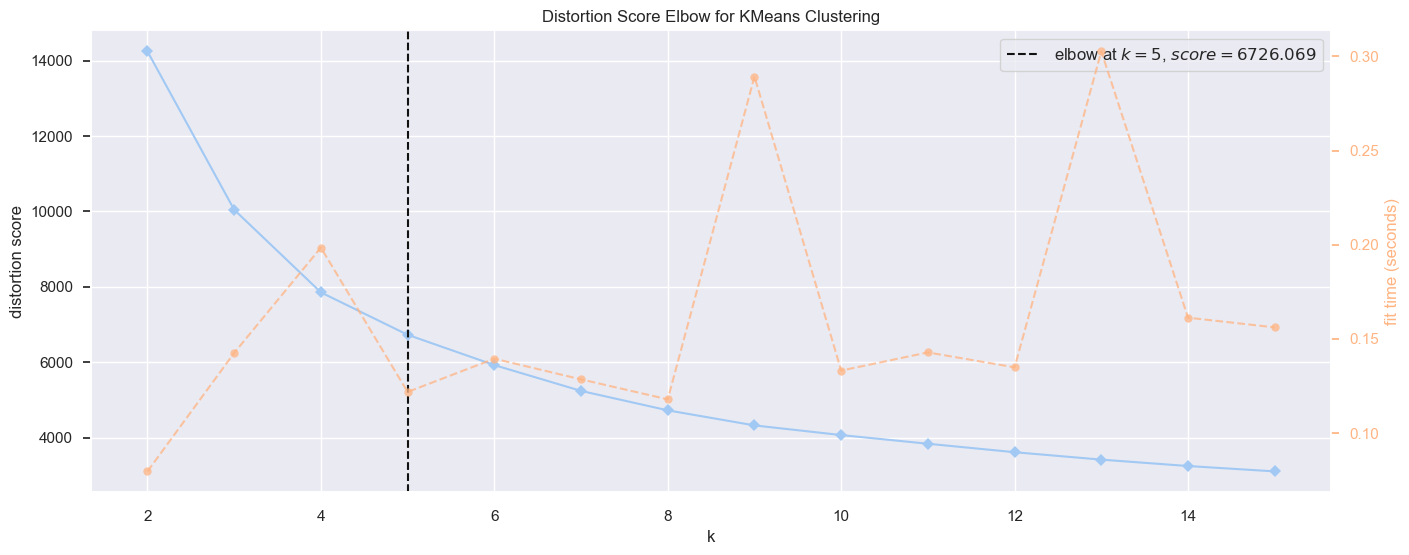

In [335]:
visualizer = KElbowVisualizer(KMeans(), k=15);

visualizer.fit(principalDf);
visualizer.show();

The optimal number of clusters for our data is 5 clusters according to the elbow method.

In [336]:
cluster_k = KMeans(n_clusters=5)
cluster_k.fit(principalDf)

visualize_clustering(principalDf, cluster_k.labels_, title="KMeans Clustering K=5")

After the K-Means clustering, we are left with the following clusters. We can see that the bottom dense area is divided into 4 clusters, while the remaining part on top is a cluster by itself

In [337]:
db.append(davies_bouldin_score(principalDf, cluster_k.labels_))
sil.append(silhouette_score(principalDf, cluster_k.labels_))

## 7.2 DBSCAN <a class="anchor" id="cluster_db"></a>

In DBSCAN, we do not have to specify the number of clusters. The algorithm decides that.

In [338]:
cluster_db = DBSCAN(eps=0.2, min_samples=6)
cluster_db.fit(principalDf)

visualize_clustering(principalDf, cluster_db.labels_, title="DBSCAN")

Even after tuning the hyperparameters on DBSCAN, it did not have much luck in clustering our data in a sensible manner. It created 10 clusters with no relation to eachother.

In [339]:
db.append(davies_bouldin_score(principalDf, cluster_db.labels_))
sil.append(silhouette_score(principalDf, cluster_db.labels_))

## 7.3 Agglomerative <a class="anchor" id="cluster_agg"></a>

Agglomoretaive clustering is a type of hierarchical clustering. It starts with every point in a cluster, then it keeps merging clusters together until we have the desired number. 

In [340]:
cluster_agg = AgglomerativeClustering(n_clusters=5)
cluster_agg.fit(principalDf)

visualize_clustering(principalDf, cluster_agg.labels_, title="Agglomerative Clustering K=5")

The clustering is close to K-means, however the clusters are wider, unlike the tight K-Means clusters.

In [341]:
db.append(davies_bouldin_score(principalDf, cluster_agg.labels_))
sil.append(silhouette_score(principalDf, cluster_agg.labels_))

## 7.4 Evaluation <a class="anchor" id="cluster_eval"></a>

Ther Davies Bouldin Index (DBI) measures the ratio between the distances of cluster points to the center and the distance between cluster centers. Therefore, we want a small number. The Silhouette Index, measures the distances between points of the same clusters, and distances between the same points and other cluster's points. This way, it can get a measure of cluster fit, how good does the point fit in its cluster.

In [342]:
res = pd.DataFrame({'Davies Bouldin Index (Lower is better)': db, 'Silhouette Index (Higher is better)': sil}, index=['KMeans', 'DBSCAN', 'Agglomerative'])
res.index.names = ['Algorithm']

res

,Davies Bouldin Index (Lower is better),Silhouette Index (Higher is better)
Algorithm,,
KMeans,0.923221,0.461299
DBSCAN,0.580418,0.055149
Agglomerative,1.201474,0.327905


DBSCAN's DBI is good, however it has a terrible silhouette score. This is expected since we saw that most points do not belong in their clusters. K-Means seems to do a better job than Agglomerative clustering in this comparison. This is supported by our visualizations. As some the clusters in Agglomerative clustering are overlapping with some other clusters. Therefore, K-Means did the best job.

In [343]:
# add cluster labels to the original dataset
df['Cluster'] = cluster_k.labels_

df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,CustomerSince,Recency,MntWines,MntFruits,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,AcceptedCmpCurrent,NumPurchases,AmountSpent,AmountPerPurchase,PersonsInHome,Cluster
0,1957,UnderGraduate,Single,58138.0,0,0,2012,58,635,88,...,0,0,0,0,1,22,1617,73.167421,2,4
1,1954,UnderGraduate,Single,46344.0,1,1,2014,38,11,1,...,0,0,0,0,0,4,27,6.585366,4,2
2,1965,UnderGraduate,In Relationship,71613.0,0,0,2013,26,426,49,...,0,0,0,0,0,20,776,38.606965,2,4
3,1984,UnderGraduate,In Relationship,26646.0,1,0,2014,26,11,4,...,0,0,0,0,0,6,53,8.688525,3,2
4,1981,PhD,In Relationship,58293.0,1,0,2014,94,173,43,...,0,0,0,0,0,14,422,29.929078,3,0


# 8 Cluster Exploration <a class="anchor" id="prof"></a>


 ## 8.1 People <a class="anchor" id="prof_people"></a>

### 8.1.1 What are the sizes of out clusters? <a class="anchor" id="prof_people_num"></a>


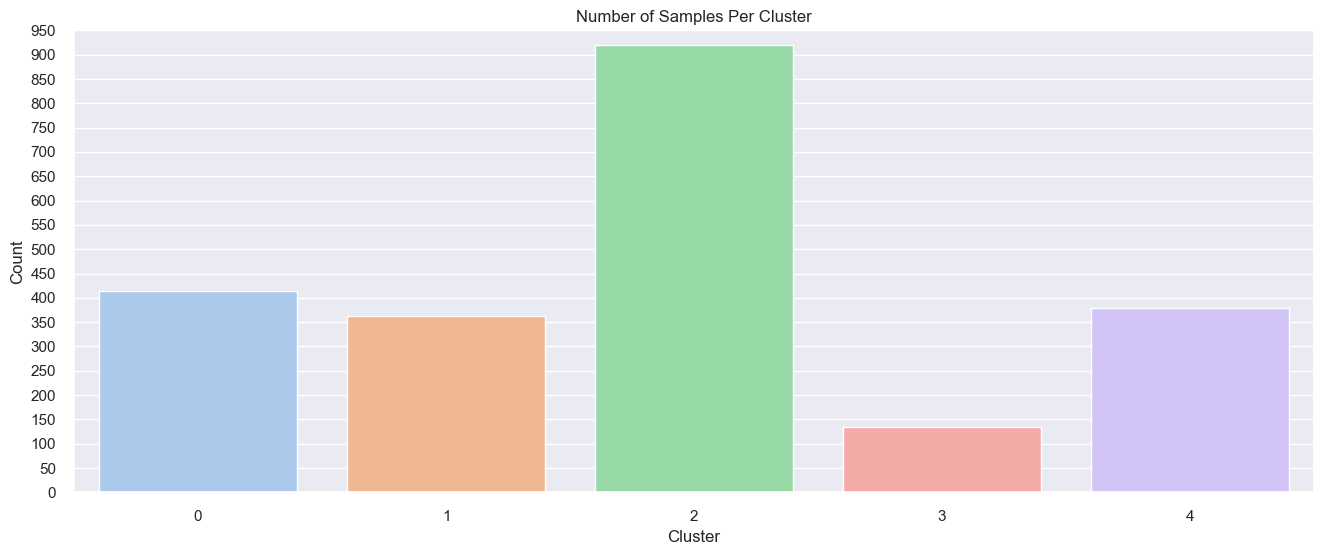

In [344]:
sns.countplot(data=df, x='Cluster');
set_labels(y="Count", x="Cluster", title="Number of Samples Per Cluster");
plt.yticks(list(range(0,951, 50)));
plt.ylim([0,950]);

The second cluster holds most of the samples in our data, which is ~925 samples in size. Followed by cluster 0 at ~420 samples. In third is cluster 4 at ~380, then 1 at ~360. Finally there is cluster 3 at ~140 samples.

### 8.1.2 What is the education distribution per cluster? <a class="anchor" id="prof_people_edu"></a>

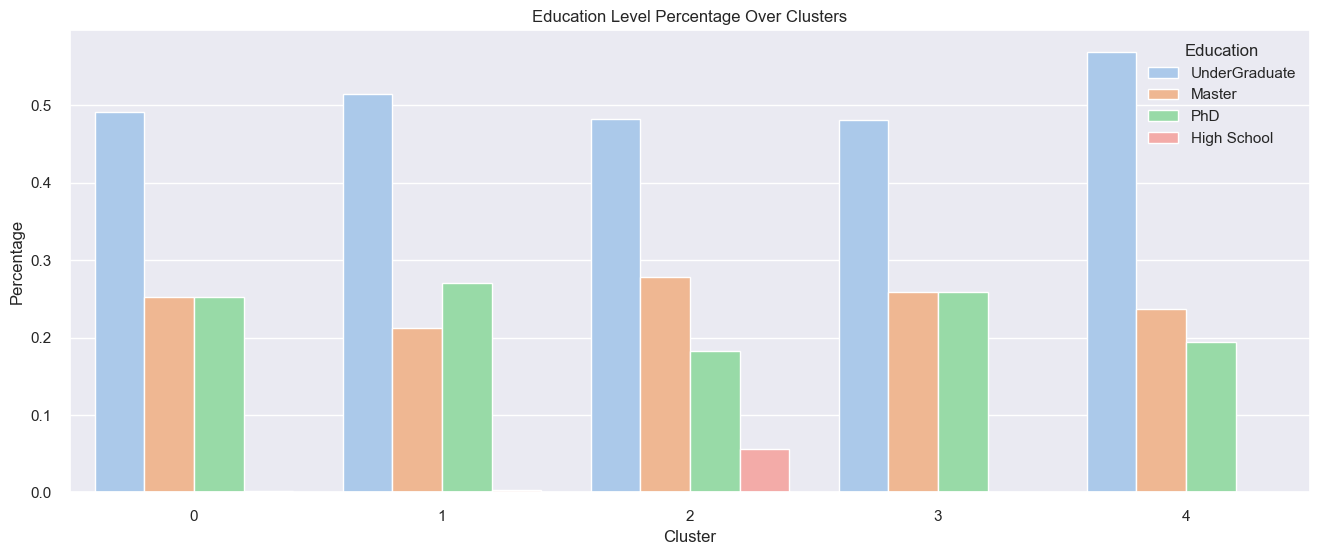

In [345]:
counted = df.groupby('Cluster').Education.value_counts(normalize=True).reset_index(name="percentage")
counted
sns.barplot(data=counted, x='Cluster', y='percentage', hue='Education');
set_labels(y="Percentage", x="Cluster", title="Education Level Percentage Over Clusters");

The dominant level through all clusters is undergraduate. However, Even though the 4th cluster is as half as the 2nd in size, it has a higher oercentage of undergraduates. Cluster 2 contains the highest percentage of master graduates and highschoolers. Cluster 1 has a higher percentage of PhD holders than the others.

### 8.1.3 What is the year of birth distribution per cluster? <a class="anchor" id="prof_people_birth"></a>

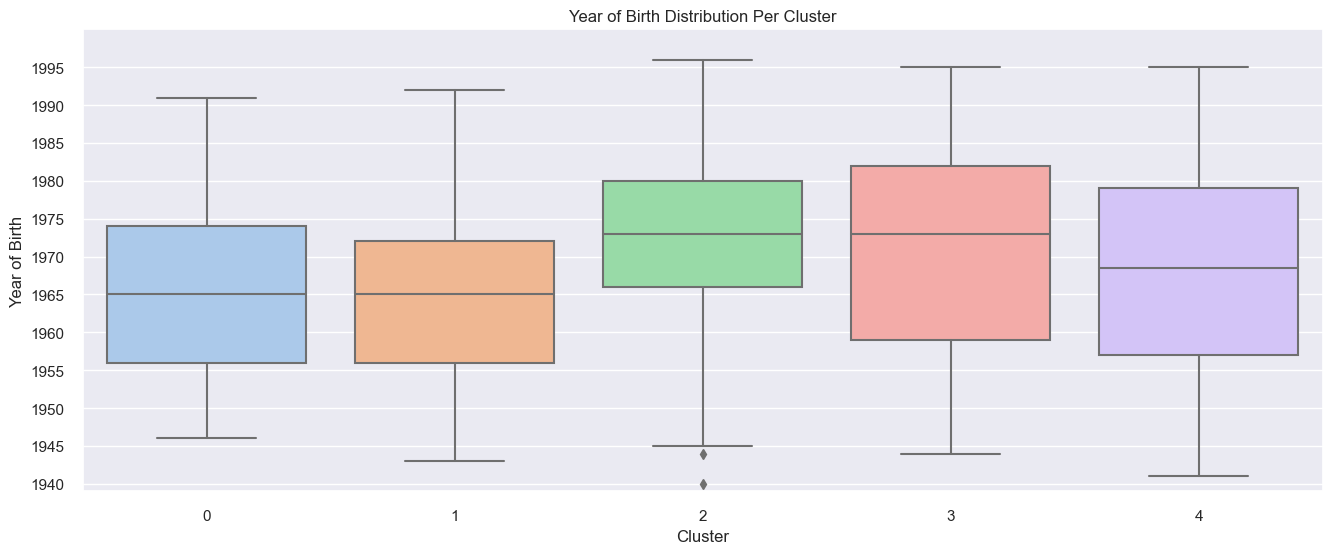

In [346]:
sns.boxplot(data=df, y='Year_Birth', x='Cluster');
set_labels(y="Year of Birth", x="Cluster", title="Year of Birth Distribution Per Cluster");
plt.yticks(list(range(1935,2000, 5)))
plt.ylim([1939,2000]);

The median year of birth in cluster 2 and 3 are higher than the rest, at around 1973. Followed by cluster 4 at 1969. The oldest medians could be found in clusters 0 and 1 at 1965. 

### 8.1.4 What is the percentage of PersonsInHome per cluster? <a class="anchor" id="prof_people_num"></a>

In [347]:
grouped = df.groupby('Cluster').PersonsInHome.value_counts().reset_index(name="count")

values = df.Cluster.value_counts()
div = [[values[0]] * 4, [values[1]] * 4, [values[2]] * 4,
       [values[3]] * 3, [values[4]] * 2]
div = [item for sublist in div for item in sublist]

grouped['percentage'] = grouped['count'] / div
grouped['text'] = round(grouped['percentage'] * 100, 2).astype(str) + "% <br>" + grouped['count'].astype(str)

fig = px.bar(data_frame=grouped, y='percentage', x='Cluster', 
             color='PersonsInHome', text=grouped['text'],
             color_discrete_sequence=px.colors.qualitative.Pastel);
             
fig.update_traces(insidetextanchor="middle");
fig.update_layout(
    xaxis = dict(
        tickmode = 'linear',
        tick0 = 0,
        dtick = 1
    ),
    title_text='Percentage and Frequency of Number of People in Household Per Cluster', title_x=0.5
)
fig.show();

Majority of clusters 0,1, and 2 have only 3 people in their household. Meanwhile clusters 3 and 4 contain have 2 people in their household. 

### 8.1.5 What is the distribution of the number of kids per cluster? <a class="anchor" id="prof_people_kid"></a>

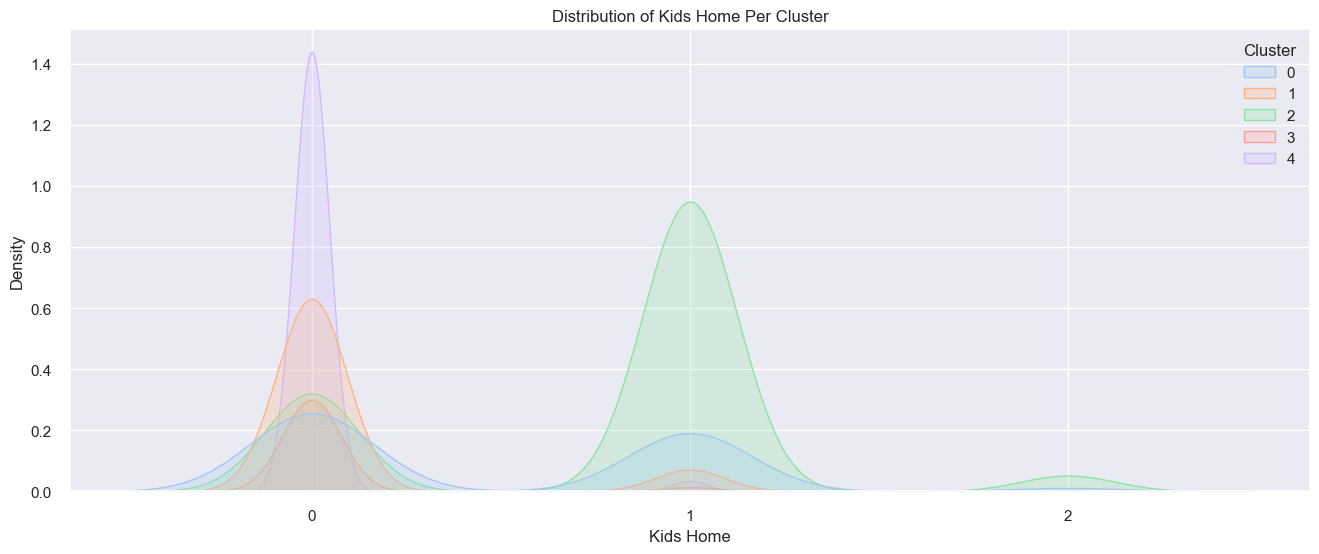

In [348]:
sns.kdeplot(data=df, x='Kidhome', hue='Cluster', palette='pastel', shade=True,);
set_labels(x="Kids Home", y="Density", title="Distribution of Kids Home Per Cluster");
plt.xticks(list(range(0,3, 1)));

Cluster 4 has an overwhelming amount of individuals without kids, this is followed by cluster 3. The overwhelming majority of cluster 2 have a single kid. 

### 8.1.6 What is the distribution of the number of teens per cluster? <a class="anchor" id="prof_people_teen"></a>

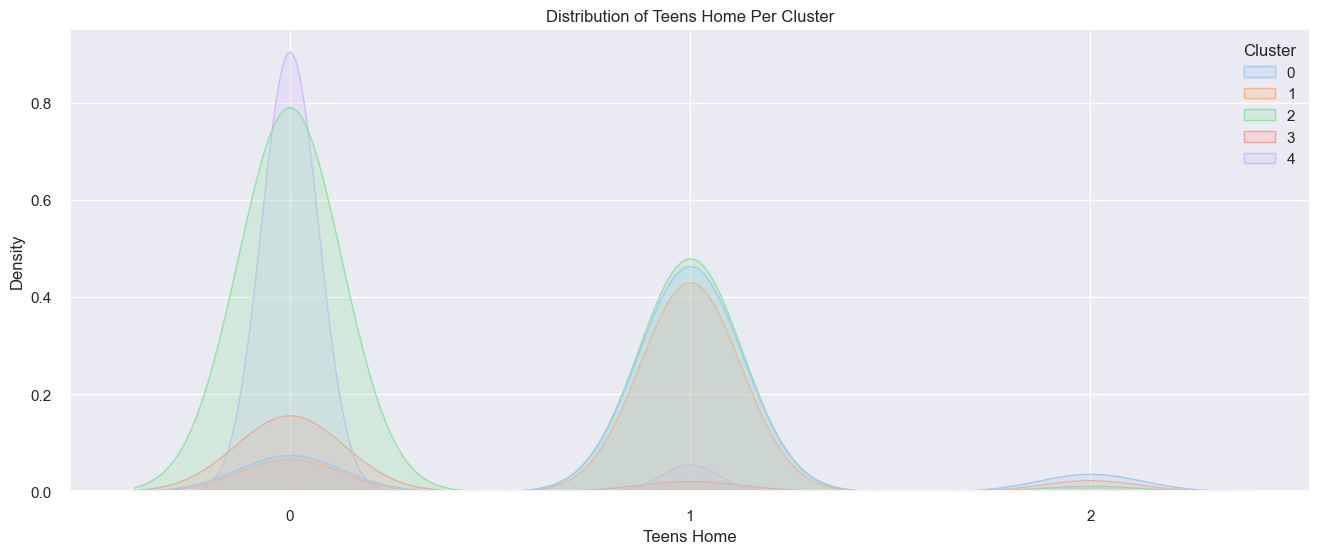

In [349]:
sns.kdeplot(data=df, x='Teenhome', hue='Cluster', palette='pastel', shade=True);
set_labels(x="Teens Home", y="Density", title="Distribution of Teens Home Per Cluster");
plt.xticks(list(range(0,3, 1)));

We notice that again, cluster 4 has the most density without teens. This time it is followed by cluster 2. The majority in clusters 0, and 1 have only 1 teen.

### 8.1.7 What is the martial status distribution of each cluster? <a class="anchor" id="prof_people_martial"></a>

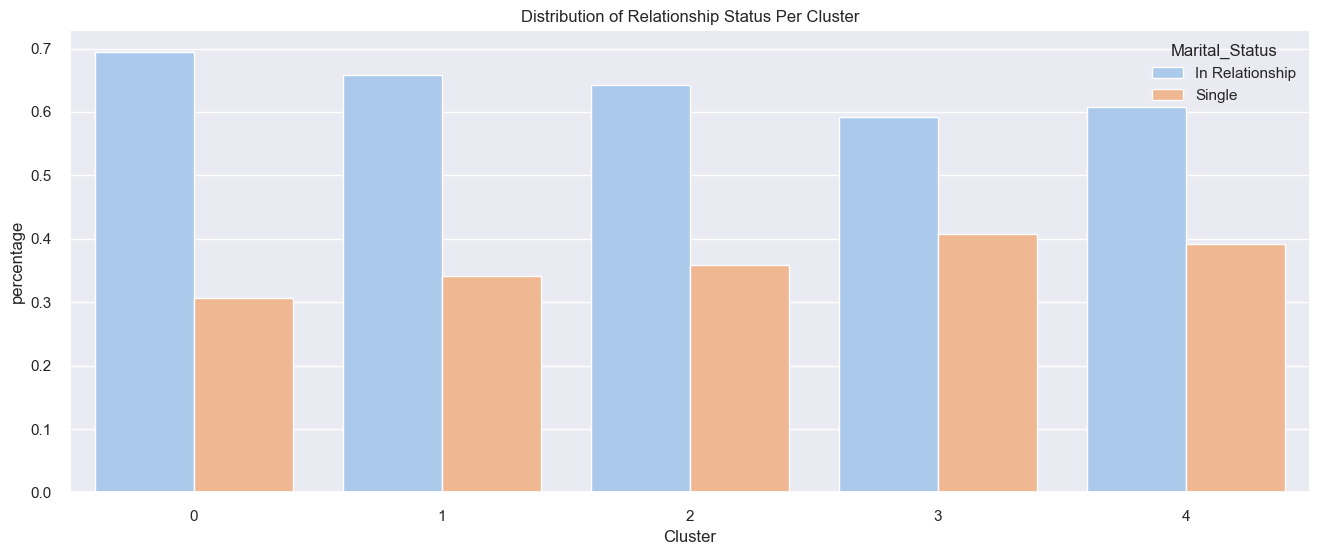

In [350]:
grouped = df.groupby("Cluster")['Marital_Status'].value_counts(normalize=True).reset_index(name="percentage")
set_labels(x="Cluster", y="Percentage", title="Distribution of Relationship Status Per Cluster");
sns.barplot(data=grouped, x='Cluster', y='percentage', hue='Marital_Status', palette='pastel');

The majority in all of them is relationship. However, cluster 4 contains the most percentage of single people, followed by 1.

### 8.1.8 Which cluster has the most income? <a class="anchor" id="prof_people_income"></a>

In [351]:
amount = df.groupby('Cluster').Income.mean()
fig = px.pie(values=np.round(amount.values, 2), names=amount.index,  
             color_discrete_sequence=px.colors.qualitative.Pastel)
fig.data[0].textinfo = 'percent+value'
fig.update_layout(title_text='Average Income Per Group', title_x=0.5)

Cluster 3 has the most income at \$80,300 yearly. This is followed by cluster 4 at \$75,300. The group with the least yearly income is cluster 2, at just \$33,640.

### 8.1.9 Which cluster spends the most on a single purchase? <a class="anchor" id="prof_people_spend"></a>

In [352]:
amount = df.groupby('Cluster').AmountPerPurchase.mean()
fig = px.pie(values=np.round(amount.values, 2), names=amount.index,  
             color_discrete_sequence=px.colors.qualitative.Pastel)
fig.data[0].textinfo = 'percent+value'
fig.update_layout(title_text='Average Amount Spent in a Single Purchase', title_x=0.5)

It is not a surprise that the two clusters with the most income (3 and 4) also spend the most, at \$87 and \$71.6.

## 8.2 Promotion <a class="anchor" id="prof_prom"></a>

### 8.2.1 Which group utilizes deals the most? <a class="anchor" id="prof_prom_deal"></a>

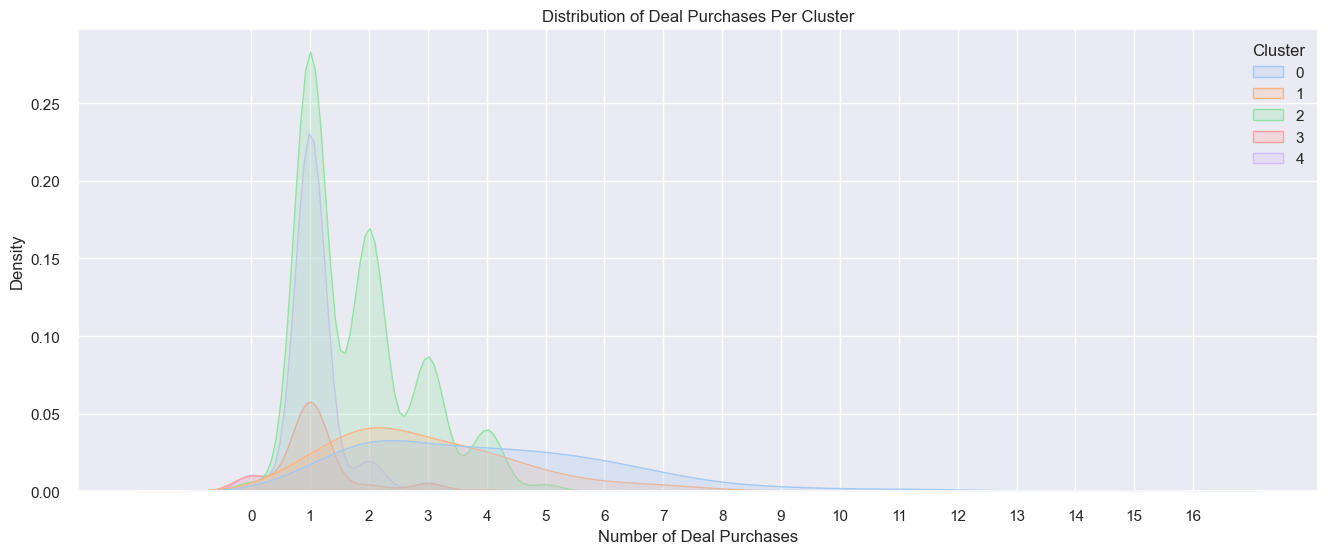

In [353]:
sns.kdeplot(data=df, x='NumDealsPurchases', hue='Cluster', palette='pastel', shade=True);
set_labels(x="Number of Deal Purchases", y="Density", title="Distribution of Deal Purchases Per Cluster");
plt.xticks(list(range(0, 17, 1)));

Group 2 (which has the least spending and income) has a high frequency of 1, 2,3, and 4 deal purchases made. Group 4 also has a high frequency of deal purchases. With group 3 being the least.

### 8.2.2 Which group accepts the most promotions on average? <a class="anchor" id="prof_prom_deal"></a>

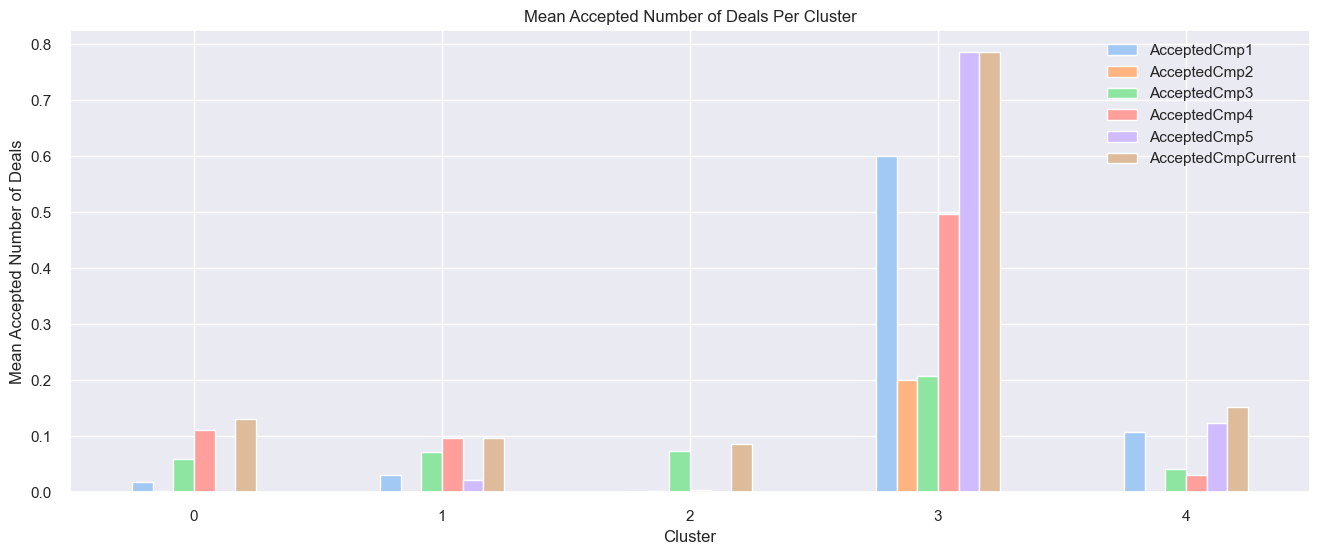

In [354]:
accepted = df.groupby("Cluster")[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
           'AcceptedCmp5', 'AcceptedCmpCurrent']].mean()

accepted.plot(kind='bar', rot=0);
set_labels(x="Cluster", y="Mean Accepted Number of Deals", title="Mean Accepted Number of Deals Per Cluster");

We can see that cluster 3 accepts a significant amount of promotions, far more than the rest. The rest have a high amount of acceptance for the current compaign but they cannot be compared to group 3.

### 8.2.3 Which product category is the most popular among groups? <a class="anchor" id="prof_prom_amt"></a>

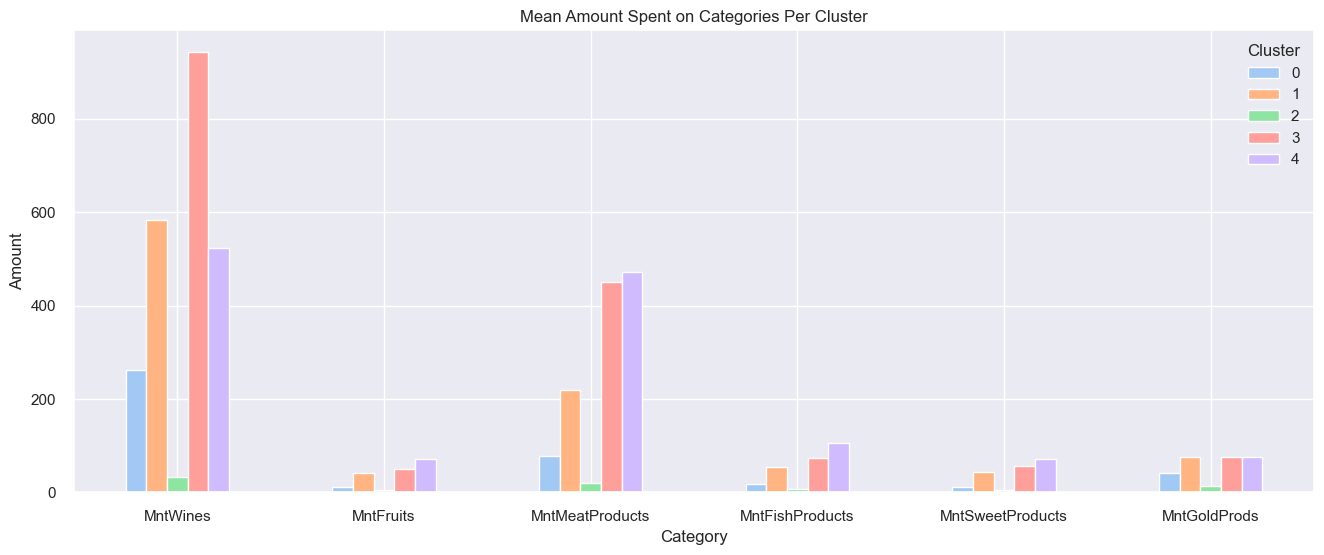

In [355]:
cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
accepted = df.groupby("Cluster")[cols].mean().T

accepted.plot(kind='bar', rot=0);
set_labels(x="Category", y="Amount", title="Mean Amount Spent on Categories Per Cluster");


Even though cluster 4 has a low amount of customers, they are a heavy consumer of wines. At almost half the amount, comes group 3 then 1. Group 1 are the top consumers of fruits, meat, fish, sweets, and gold.

## 8.3 Place <a class="anchor" id="prof_place"></a>

### 8.3.1 Which outlet is the most popular among the group? <a class="anchor" id="prof_place_1"></a>

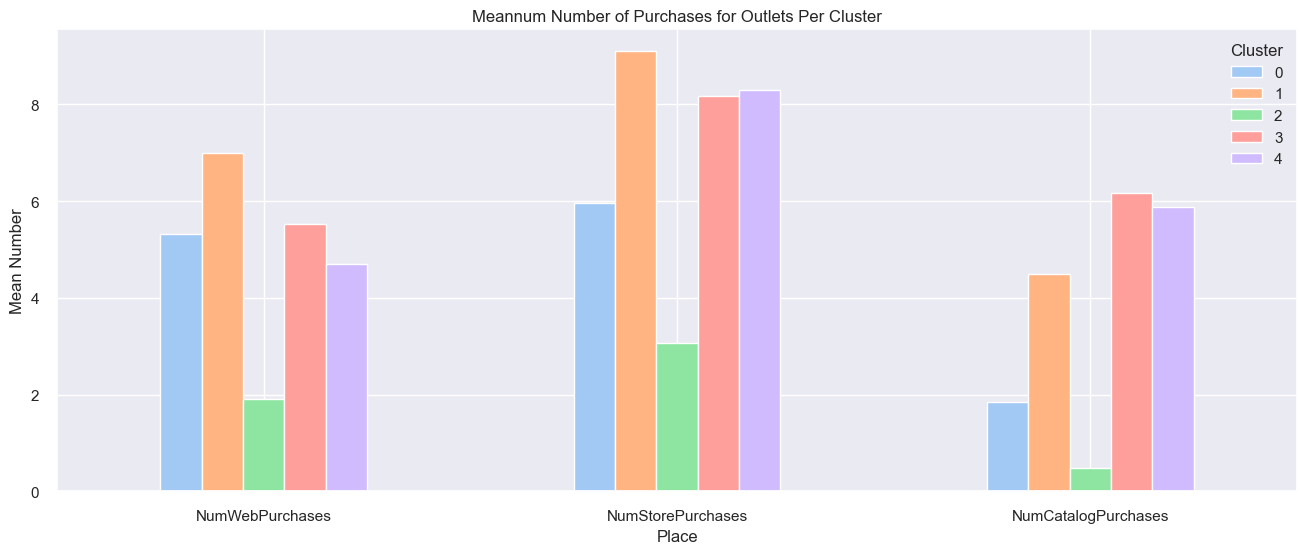

In [356]:
accepted = df.groupby("Cluster")[['NumWebPurchases', 'NumStorePurchases', 'NumCatalogPurchases']].mean().T

accepted.plot(kind='bar', rot=0);
set_labels(x="Place", y="Mean Number", title="Meannum Number of Purchases for Outlets Per Cluster");

Group 3 shop mainly in store and online. Group 4 shops mainly in store then the catalog, same as group 1. Group 0 prefer the store then the web, same as group 2.

# 9 Deployment

In [357]:
def process_predict(data):
    # feature engineering
    cols = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
    data['NumPurchases'] = data[cols].sum(axis=1)
    
    cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
    data['AmountSpent'] = data[cols].sum(axis=1)
    
    cols = ['Kidhome', 'Teenhome']
    data['PersonsInHome'] = data[cols].sum(axis=1) + 2  
    data.loc[(data.Marital_Status == 'Single')].PersonsInHome = data.loc[(data.Marital_Status == 'Single')].PersonsInHome - 1
    
    data['AmountPerPurchase'] = data['AmountSpent'] / (data['NumPurchases'] + 1e-1) 
    
    categorical = data.select_dtypes(include=["object"])

    # encode
    le = LabelEncoder()
    for col in categorical:
      data[col] = le.fit_transform(data[col])
    
    # scale
    sc = StandardScaler()
    data = pd.DataFrame(sc.fit_transform(data), columns=data.columns)
    
    principalComponents_2 = pca.transform(data)
    principalDf_2 = pd.DataFrame(data = principalComponents_2, columns=['PC1', 'PC2', 'PC3'])
    

    return pd.DataFrame({"Cluster": cluster_k.predict(principalDf_2)})

In [ ]:
app = Flask(__name__, static_folder='style')
###########################
@app.route("/")
def home(): 
    return render_template('index.html')

@app.route("/predict.html",  methods=['GET','POST'])
def predict(): 
    if request.method == 'POST':
        uploaded_file = request.files['file']
        df_up = pd.read_csv(uploaded_file)
        pred = process_predict(df_up)
        return pred.to_html()
        
    return render_template('predict.html')

###########################
app.run()

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


# 10 Conclusion

During this notebook, we analyzed the customer data in order to infer insights. We then proceeded to cluster our data in order to segment our customers. After exploring the various customer segments, we concluded that customers fall under one of 5 segments. These segments have the following attributes:

* Segement 0
    * The majority hold a bachelor degree
    * Their median year of birth is around 1965
    * Their families cintains 3-4 indiividuals
    * The majority have a teen at home and 0-1 kids
    * The majority are in a relationship,and a third are single
    * Their mean yearly income is about \$51,000
    * They spend about \$31 per purchace
    * They consume deals often
    * They rarely accept promotions
    * Moderate consumers of wine, meat, and gold
* Segement 1
    * The majority hold a bachelor degree, and the largest amount of PhD holders
    * Their median year of birth is around 1965
    * Their families cintain 3 indiividuals
    * The majority have no children
    * The majority are in a relationship, and a third are single
    * Their mean yearly income is about \$64,200
    * They spend about \$50.4 per purchace
    * They consume deals sometimes, mostly 2 deals in total.
    * They rarely accept promotions
    * High consumers of wine and gold. Moderate meat consumers
* Segement 2
    * They make the majority of the customers
    * The majority hold a bachelor degree, and the largest amount of Master's degree holders
    * Their median year of birth is around 1973
    * Their families cintain 3-4 indiividuals, tenth of them contain 2
    * The majority have 1 kid, and 0-1 teens
    * The majority are in a relationship, and a third are single
    * Low mean yearly income at about \$33,600
    * They spend about a low amount of \$13 per purchace
    * They are the heaviest consumer of deals. At around 1-3 deals per person
    * They rarely accept promotions
    * They rarely buy products
* Segement 3
    * The majority hold a bachelor degree, %25 are masters and %25 are PhDs
    * Their median year of birth is around 1973
    * Their families cintain 2 indiividuals
    * The majority have no children, rarely kids or teens
    * The majority are in a relationship, %40 are single
    * They are the wealthiest customers, at a yearly income of about \$80,300
    * They are the biggest spenders, at about \$87.3 per purchace
    * They rarely consume deals, mostly 1 deals in total per person.
    * They are always much more likely to accept promotions.
    * Highest consumers of wine. High consumers of meat
* Segement 4
    * The highest amount of bachelor holders, %25 are masters and %20 are PhDs
    * Their median year of birth is around 1969
    * Their families cintain 2 indiividuals
    * The majority have no children
    * The majority are in a relationship, %39 are single
    * High yearly income at about \$75,300
    * High spenders, at about \$71.6 per purchace
    * They second most consumers of deals, mostly 1 deals in total per person.
    * They someimes accept promotions.
    * Highest consumers of meat, fish, and fruits. High consumers of wine